In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
# Load files
try:
    test_file = "test.csv"
    train_file = "train.csv"
    train_data = pd.read_csv(train_file)
    test_data = pd.read_csv(test_file)
    print("Both files succesfully loaded")
except Exception as e:
    print("Error{}". format(e))

Both files succesfully loaded


In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Data Visualizations and Exploration
# Dimensions
train_data.shape, test_data.shape

((891, 12), (418, 11))

In [6]:
# Check for null characters
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

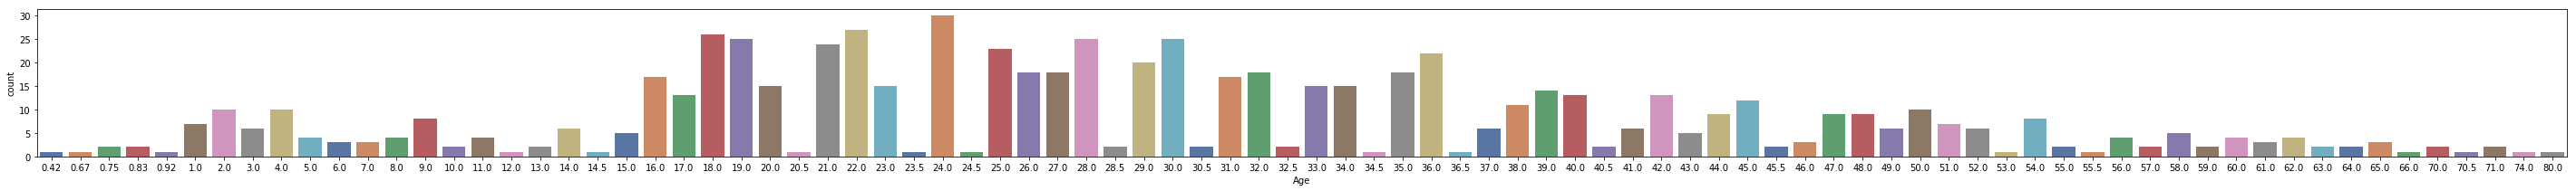

In [7]:
# Lets look at 'Age'
plt.figure(figsize=(50,3))
sbn.countplot(x = "Age",data = train_data, palette = 'deep')
plt.show()

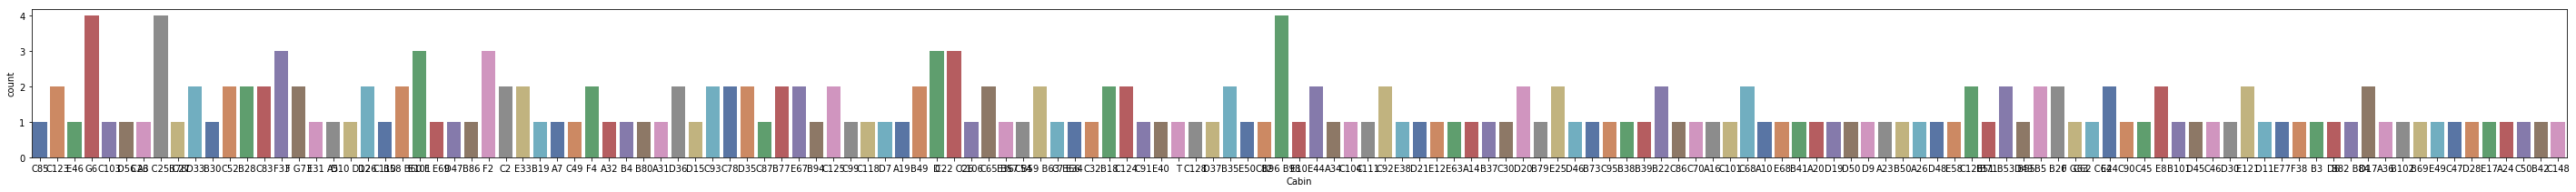

In [8]:
# Lets look at cabin --> Lot of missing values --> probably going to get rid of it
plt.figure(figsize=(50,3))
sbn.countplot(x = "Cabin",data = train_data, palette = 'deep')
plt.show()

In [9]:
# Variable assignment --> drop columns that we don't need (Ticket#). 
x_train_data = train_data.iloc[:,[1,2,3,4,5,6,7,9,10,11]]
x_test_data = test_data.iloc[:,[0,1,2,3,4,5,6,8,9,10]]

In [10]:
x_train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [11]:
x_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


In [12]:
x_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [13]:
x_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


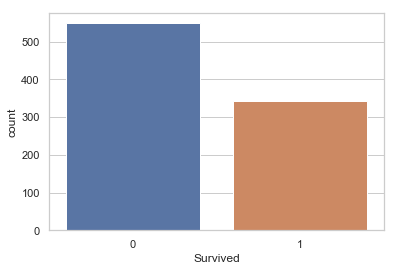

In [14]:
# Data visualization
# Predict Variable --> "Survived" --> 0 = Died, 1 = survived
sbn.set(style="white")
sbn.set(style="whitegrid", color_codes=True)
sbn.countplot(x='Survived', data=x_train_data,palette="deep")
plt.show()

In [15]:
# Fix NaN
train_mean_age = x_train_data["Age"].mean()
test_mean_age = x_test_data["Age"].mean()
x_train_data["Age"].fillna(train_mean_age, inplace=True)
x_test_data["Age"].fillna(test_mean_age, inplace=True)
x_train_data["Embarked"].fillna("S", inplace=True)
x_test_data["Embarked"].fillna("S", inplace = True)
x_train_data["Cabin"].fillna('0', inplace=True)
x_test_data["Cabin"].fillna("0", inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [16]:
x_train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,S


In [17]:
x_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,0,S


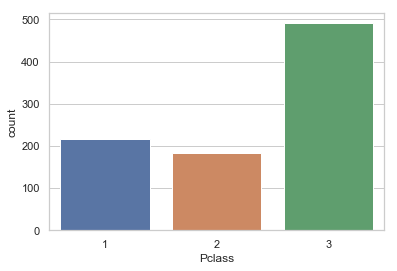

In [18]:
# Pclass 
sbn.countplot(x = "Pclass", data = x_train_data)

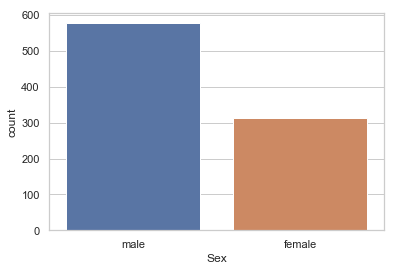

In [19]:
# Sex
sbn.countplot(x = 'Sex', data = x_train_data)

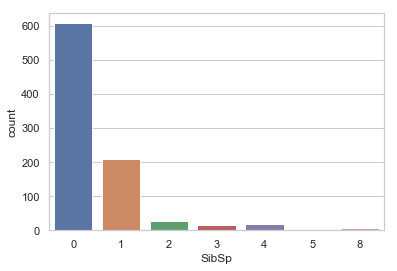

In [20]:
#SibSp
sbn.countplot(x = "SibSp", data = x_train_data)

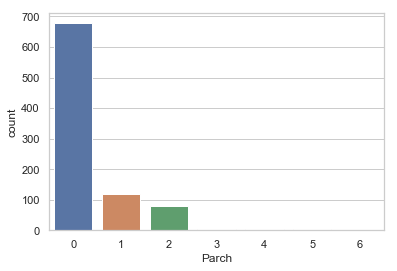

In [21]:
# Parch
sbn.countplot(x = "Parch", data = x_train_data)

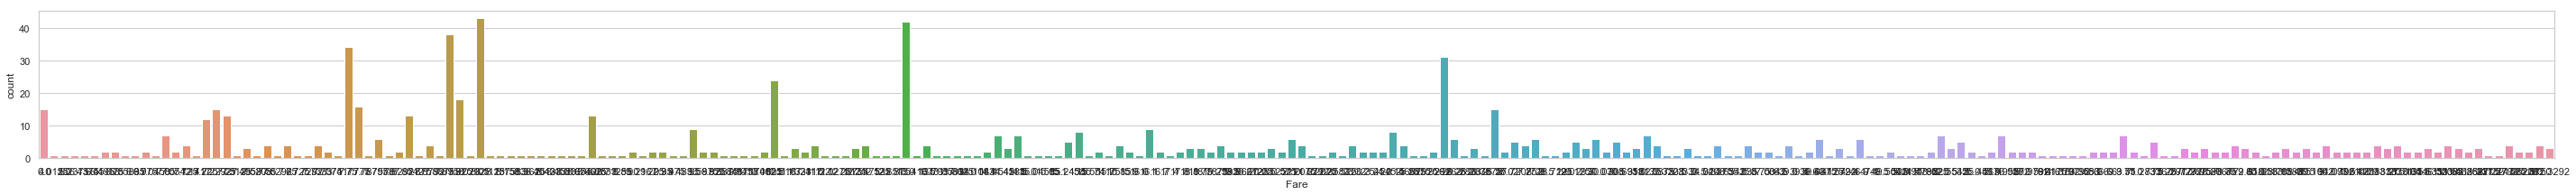

In [22]:
# Fare
plt.figure(figsize=(50,3))
sbn.countplot(x = "Fare", data = x_train_data)

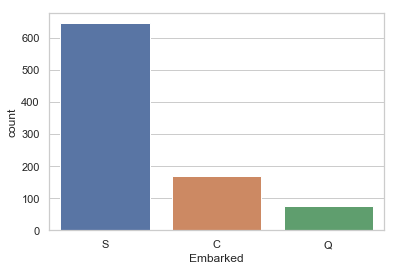

In [23]:
# Embarked
sbn.countplot(x = "Embarked", data = x_train_data)

# Embarked and SibSp and Parch look related somehow
# Sibsp = # of siblings/spouses aboard
# Parch = # of parents/children aboard
# Embarked = port of embarkation

In [24]:
x_train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


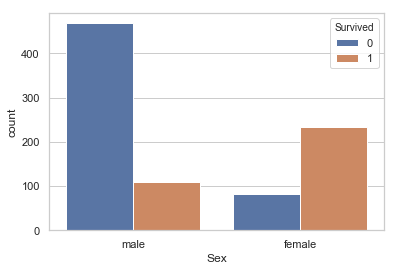

In [25]:
# Who survived by Sex
sbn.countplot(x="Sex", hue = "Survived", data = x_train_data)

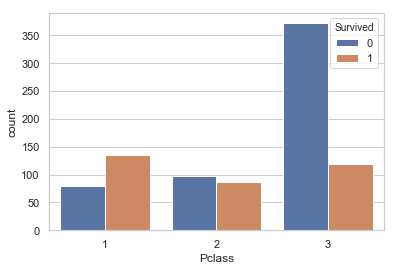

In [26]:
# Who survived by Pclass
sbn.countplot(x="Pclass", hue = "Survived", data = x_train_data)

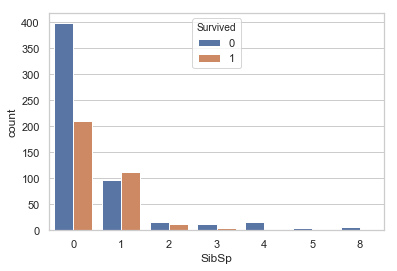

In [27]:
# Who survived by sibsp
sbn.countplot(x="SibSp", hue = "Survived", data = x_train_data)

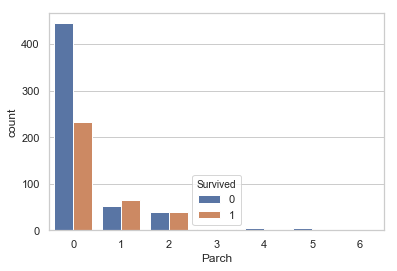

In [28]:
# Who survived by Parch
sbn.countplot(x="Parch", hue = "Survived", data = x_train_data)

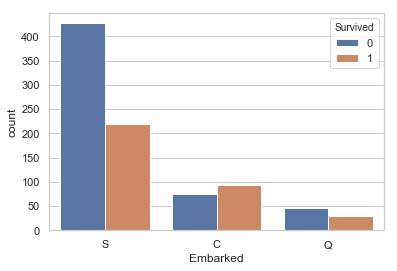

In [29]:
# Who survived by embarked
sbn.countplot(x="Embarked", hue = "Survived", data = x_train_data)

In [30]:
# Adding a feature family
x_train_data["Family"] = x_train_data["Parch"] + x_train_data["SibSp"] + 1
x_test_data["Family"] = x_test_data["Parch"] + x_test_data["SibSp"] + 1 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
x_train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,S,1


In [32]:
# Encode 'Sex'
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
label_encoder = LabelEncoder()
x_train_data.iloc[:,3] = label_encoder.fit_transform(x_train_data.iloc[:,3].values)
x_test_data.iloc[:,3] = label_encoder.fit_transform(x_test_data.iloc[:,3].values)

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [33]:
x_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,0,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,0,S,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,0,Q,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,0,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,0,S,3


In [34]:
# Encode 'Embarked'
x_train_data.iloc[:,9] = label_encoder.fit_transform(x_train_data.iloc[:,9].values)
x_test_data.iloc[:,9] = label_encoder.fit_transform(x_test_data.iloc[:,9].values)

In [35]:
x_train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,2,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,0,2
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,2,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,2,1


In [36]:
x_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,0,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,0,2,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,0,1,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,0,2,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,0,2,3


In [37]:
# get cabin code
x_train_data['CabinCode'] = x_train_data['Cabin'].astype(str).str[0]
x_test_data['CabinCode'] = x_test_data['Cabin'].astype(str).str[0]

In [38]:
x_train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,CabinCode
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,2,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,0,2,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,2,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,2,2,C
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,2,1,0


In [39]:
x_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,CabinCode
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,0,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,0,2,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,0,1,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,0,2,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,0,2,3,0


In [40]:
# encode cabinCode
x_train_data.iloc[:,11] = label_encoder.fit_transform(x_train_data.iloc[:,11].values)
x_test_data.iloc[:,11] = label_encoder.fit_transform(x_test_data.iloc[:,11].values)
x_train_data = x_train_data.drop("Cabin", axis=1)
x_test_data = x_test_data.drop("Cabin", axis=1)

In [41]:
x_train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,CabinCode
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,2,3
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,2,3
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,1,0


In [42]:
x_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,CabinCode
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,2,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,1,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,2,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,2,3,0


In [43]:
# Deal with Name category --> Filter out marital status 
x_train_data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [44]:
train_test_data = [x_train_data, x_test_data] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [45]:
x_train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Capt          1
Don           1
Lady          1
Ms            1
Countess      1
Jonkheer      1
Sir           1
Mme           1
Name: Title, dtype: int64

In [46]:
x_test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [47]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [48]:
x_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null int64
Family         418 non-null int64
CabinCode      418 non-null int64
Title          418 non-null int64
dtypes: float64(2), int64(9), object(1)
memory usage: 39.3+ KB


In [49]:
x_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null int64
Age          891 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null float64
Embarked     891 non-null int64
Family       891 non-null int64
CabinCode    891 non-null int64
Title        891 non-null int64
dtypes: float64(2), int64(9), object(1)
memory usage: 83.6+ KB


In [50]:
# Drop 'Name'
x_train_data = x_train_data.drop("Name", axis = 1)
x_test_data = x_test_data.drop("Name", axis = 1)

In [51]:
x_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null float64
Embarked     891 non-null int64
Family       891 non-null int64
CabinCode    891 non-null int64
Title        891 non-null int64
dtypes: float64(2), int64(9)
memory usage: 76.6 KB


In [52]:
x_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null int64
Family         418 non-null int64
CabinCode      418 non-null int64
Title          418 non-null int64
dtypes: float64(2), int64(9)
memory usage: 36.0 KB


In [53]:
x_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null int64
Family         418 non-null int64
CabinCode      418 non-null int64
Title          418 non-null int64
dtypes: float64(2), int64(9)
memory usage: 36.0 KB


In [54]:
x_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null float64
Embarked     891 non-null int64
Family       891 non-null int64
CabinCode    891 non-null int64
Title        891 non-null int64
dtypes: float64(2), int64(9)
memory usage: 76.6 KB


In [55]:
x_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null int64
Family         418 non-null int64
CabinCode      418 non-null int64
Title          418 non-null int64
dtypes: float64(2), int64(9)
memory usage: 36.0 KB


In [56]:
x_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null float64
Embarked     891 non-null int64
Family       891 non-null int64
CabinCode    891 non-null int64
Title        891 non-null int64
dtypes: float64(2), int64(9)
memory usage: 76.6 KB


In [57]:
mean_fare = x_test_data["Fare"].mean()
x_test_data["Fare"].fillna(mean_fare, inplace=True)

In [58]:
x_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int64
Family         418 non-null int64
CabinCode      418 non-null int64
Title          418 non-null int64
dtypes: float64(2), int64(9)
memory usage: 36.0 KB


In [59]:
x_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,CabinCode,Title
0,0,3,1,22.0,1,0,7.2500,2,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,2,3,2
2,1,3,0,26.0,0,0,7.9250,2,1,0,1
3,1,1,0,35.0,1,0,53.1000,2,2,3,2
4,0,3,1,35.0,0,0,8.0500,2,1,0,0


In [60]:
x_test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,CabinCode,Title
0,892,3,1,34.5,0,0,7.8292,1,1,0,0
1,893,3,0,47.0,1,0,7.0000,2,2,0,2
2,894,2,1,62.0,0,0,9.6875,1,1,0,0
3,895,3,1,27.0,0,0,8.6625,2,1,0,0
4,896,3,0,22.0,1,1,12.2875,2,3,0,2


In [61]:
x_train_data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,CabinCode,Title
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675,0.016639,0.287944,0.445792
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098,0.065997,-0.570691,-0.164205
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262,-0.200988,-0.143517,-0.557890
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749,-0.248512,0.169076,-0.137559
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230,0.890712,-0.031973,0.287060
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798,0.783111,0.037621,0.341660
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719,0.217138,0.337525,0.144773
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000,0.066516,-0.080523,-0.069734
Family,0.016639,0.065997,-0.200988,-0.248512,0.890712,0.783111,0.217138,0.066516,1.000000,-0.003057,0.366883
CabinCode,0.287944,-0.570691,-0.143517,0.169076,-0.031973,0.037621,0.337525,-0.080523,-0.003057,1.000000,0.120564


In [62]:
y_train = x_train_data["Survived"]
x_train = x_train_data.drop("SibSp", axis=1)
x_train = x_train_data.drop("Parch", axis=1)
x_train = x_train_data.drop("Survived",axis=1)
x_test = x_test_data.drop("SibSp", axis = 1)
x_test = x_test_data.drop("Parch", axis = 1)
x_test = x_test_data.drop("PassengerId", axis = 1)

In [63]:
y_train.shape, x_train.shape, x_test.shape

((891,), (891, 10), (418, 10))

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(x_train,y_train)
pred_log_reg = model.predict(x_test)
accuracy = round(model.score(x_train, y_train)*100,2)
print("Accuracy =", str(accuracy))

Accuracy = 81.82


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
# Overfitting?
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 3000,min_samples_leaf=3,max_features=0.5,n_jobs=-1)
model.fit(x_train, y_train)
pred_RF = model.predict(x_test)
accuracy_RF = model.score(x_train, y_train)*100
print("Accuracy of Random Forest =",accuracy_RF)

Accuracy of Random Forest = 90.46015712682379


In [69]:
submission = pd.DataFrame({
    "PassengerId": x_test_data["PassengerId"],
    "Survived" : pred_RF
})

In [70]:
submission.to_csv('Submission.csv', index=False)